# Data Visualisation
This Jupyter Notebook contains code that visualises the data used in the thesis. First the networks are drawn then the raw and processed data, and finally the results are visualised

In [32]:
# Required packages (check which are required)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import community
from shapely.geometry import Polygon

import random
import math

import cmocean as cmo


%matplotlib inline

In [43]:
# Read the data from data_processing.ipynb
# Calibration Data
sa_calibration_data = pd.read_csv('../Data_Labour/calibration_data.csv', sep = ',')

# Network Data
absolute_workers = pd.read_csv('../Data_Labour/Occupation_transitions.csv', sep = ',')
frey_osborne_translated = pd.read_csv('../Data_Labour/occupation_shock.csv', sep = ',', index_col = 'ssyk3')

# Occupational Mobility Network
G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')

# Occupational Mobility Network

In [44]:
# This sets up the visualization of the network
## The size of the nodes is proportional to the amount of workers who stayed in their proffesion between 2016 and 2017

def softmax(A,k=1.0):
    """
    Calculates the softmax of a distribution, modulated by the precision term, k
    Used here to adjust the size of the nodes
    """
    A = np.array(A) if not isinstance(A, np.ndarray) else A
    A = A*k
    maxA = A.max()
    A = A-maxA
    A = np.exp(A)
    return A/np.sum(A)

# Create the graph G from the adjeceny matrix
G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')

# List of all the occupation codes
occupations = list(G.nodes)

# Dictionaries holding the first and second levels of the SSYK code respectively
first_level = {name:name[0] for name in occupations}
second_level = {name:name[0:1] for name in occupations}

# The amount of workers who stayed in their proffession
remain_workers = np.diag(absolute_workers)

# Make it into a dict 
remain_dict = dict(zip(list(G.nodes), remain_workers))

# Calculate the size of each node
ns = softmax(0.7*np.log2(10000+np.array(list(remain_dict.values()))))*15000

# Give the network the attributes used for visualisation
nx.set_node_attributes(G, first_level, 'SSYK1')
nx.set_node_attributes(G, second_level, 'SSYK2')
nx.set_node_attributes(G, remain_dict, 'remained_workers')

# Ten colors used for visualisation
cols = ["#69b243", "#ad5ec7", "#bfaf48", "#7778c8", "#c87f41", "#4bafd0", "#ce4a3d", "#55a977", "#cd4b8f", "#70742e", "#c36a7c"]

# Get all the unique first level codes
vals = list(set(val for val in first_level.values()))

# Make a dict that stores the color each node should get based on their first level
col_dict = {}
for i in range(len(vals)):
    col_dict[vals[i]] = cols[i]

# Make a list that contains the color of every node
node_col_list = [col_dict[val] for val in first_level.values()]
edge_col_list = [col_dict[val[0]] for val,_ in G.edges()]

# Make a list that contains the weight for each link
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
weights = softmax(0.7*np.log2(1000+np.array(weights)))*1500



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


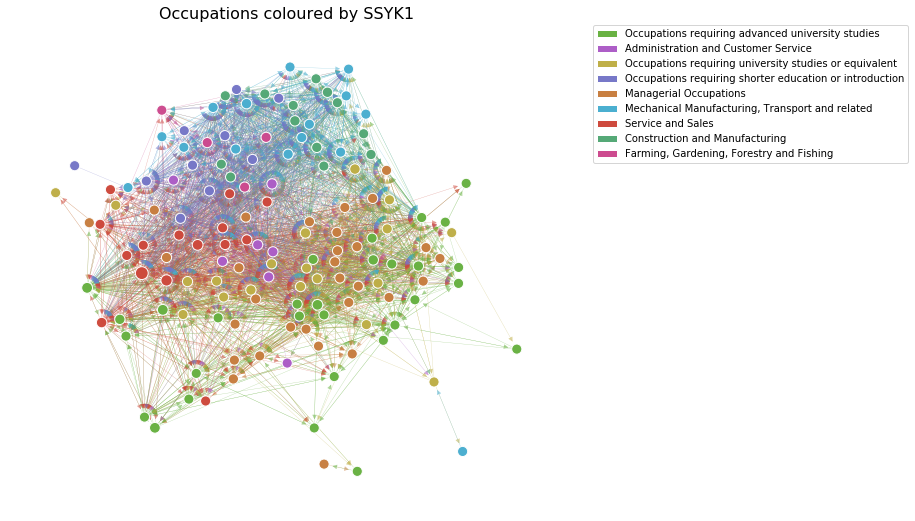

In [9]:
# This section visualises the network where nodes are colored by their first level code and the size correspond to the number of workers 
# who stayed in their proffession


fig, ax = plt.subplots(1,1,figsize=(10,9))

legend_elements = []

occ_dict = {'1': 'Chefsyrken', '2': 'Yrken med krav på fördjupad högskolekompetens', '3':'Yrken med krav på högskolekompetens eller motsvarande', '4': 'Yrken inom administration och kundtjänst', '5':'Service-, omsorgs- och försäljningsyrken', '6': 'Yrken inom lantbruk, trädgård, skogsbruk och fiske', '7':'Yrken inom byggverksamhet och tillverkning', '8': 'Yrken inom maskinell tillverkning och transport m.m.', '9':'Yrken med krav på kortare utbildning eller introduktion'}

en_occ_dict = {'1': 'Managerial Occupations', '2': 'Occupations requiring advanced university studies', '3':'Occupations requiring university studies or equivalent', '4': 'Administration and Customer Service', '5':'Service and Sales', '6': 'Farming, Gardening, Forestry and Fishing', '7':'Construction and Manufacturing', '8': 'Mechanical Manufacturing, Transport and related', '9':'Occupations requiring shorter education or introduction'}

for level, col in col_dict.items():
    legend_elements.append(Patch(facecolor = col, edgecolor='w', label=en_occ_dict[level]))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, with_labels = True, node_color=node_col_list, node_size = ns, alpha=0.99, edgecolors='w', ax = ax)

nx.draw_networkx_edges(G, pos, edge_color=edge_col_list, width=weights, alpha=0.5, ax=ax)

ax.set_axis_off()

ax.set_title("Occupations coloured by SSYK1", fontsize=16)


# Create the figure

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('../Graphs/Occ_mob_SSYK.pdf', dpi=425, bbox_inches='tight')
plt.show()

# Two occupations only have a self-loop

{'111': 0.1005, '112': 0.0875, '121': 0.069, '122': 0.3239333333333333, '123': 0.423125, '124': 0.1337142857142857, '125': 0.117, '129': 0.2976470588235293, '131': 0.035, '132': 0.5303076923076923, '133': 0.0175, '134': 0.25, '135': 0.355, '136': 0.16366666666666665, '137': 0.03, '138': 0.6751333333333334, '141': 0.007300000000000002, '142': 0.015, '149': 0.0482, '151': 0.0073, '152': 0.006999999999999999, '153': 0.08365, '154': 0.016550000000000002, '159': 0.25, '161': 0.1054, '171': 0.0039, '172': 0.083, '173': 0.20000000000000004, '174': 0.197, '179': 0.16875, '211': 0.29963636363636365, '212': 0.1484, '213': 0.1305157894736842, '214': 0.07375000000000001, '216': 0.2906, '217': 0.09063636363636364, '218': 0.2667777777777778, '221': 0.0042, '222': 0.009000000000000001, '223': 0.11166666666666664, '224': 0.006999999999999999, '225': 0.038, '226': 0.0215, '227': 0.012436363636363636, '228': 0.02235, '231': 0.032, '232': 0.1344, '233': 0.0078, '234': 0.08153333333333332, '235': 0.100245

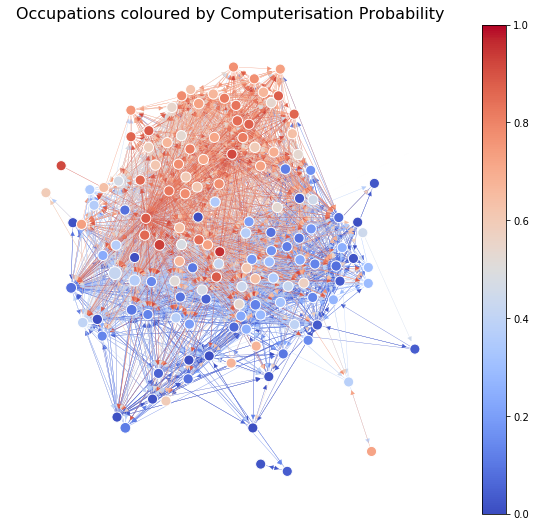

In [48]:
# Visualisation of Frey and Osborne data
# This section visualises the network where nodes are colored by their first level code and the size correspond to the number of workers 
# who stayed in their proffession
fig, ax = plt.subplots(1,1,figsize=(10,9))


fo_dict = {str(key):val for key, val in frey_osborne_translated.to_dict()['Computerisation Probability'].items()}
print(fo_dict)


node_colors = [plt.cm.coolwarm(fo_dict[occ]) for occ in G.nodes]
edge_colors = [plt.cm.coolwarm(fo_dict[occ]) for occ,_ in G.edges]

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(0,1))
sm._A = []
plt.colorbar(sm)

nx.draw_networkx_nodes(G, pos, with_labels = True, node_color=node_colors, node_size = ns, alpha=0.99, edgecolors='w', ax = ax)

nx.draw_networkx_edges(G, pos, edge_color= edge_colors, width=weights, alpha=0.5, ax=ax)

ax.set_axis_off()

ax.set_title("Occupations coloured by Computerisation Probability", fontsize=16)

# plt.savefig('../Graphs/Occ_mob_CP.pdf', dpi=425, bbox_inches='tight')
plt.show()

# Beveridge Curve

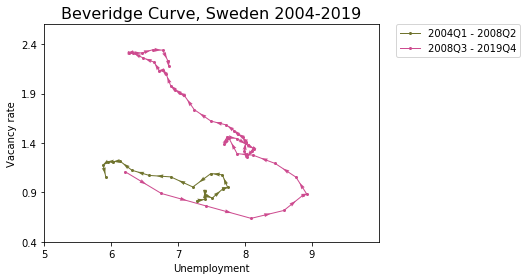

In [49]:
sa_calibration_data = pd.read_csv('../Data_Labour/calibration_data.csv')

plot_ls = []
plot_dict = {'start': '', 'end': '', 'u': [], 'vac': []}

prev_status = sa_calibration_data['recession'].iloc[0]
plot_dict['start'] = sa_calibration_data['date'].iloc[0]
status_change = 0
for i in range(len(sa_calibration_data)):
    status = sa_calibration_data['recession'].iloc[i]
    if status == prev_status:
        plot_dict['u'].append(sa_calibration_data['u_trend'].iloc[i])
        plot_dict['vac'].append(sa_calibration_data['sa_vac_rate'].iloc[i])
    else:
        status_change += 1
        if status_change == 3:
            plot_dict['end'] = sa_calibration_data['date'].iloc[i-1]
            plot_ls.append(plot_dict)
            plot_dict = {'start': sa_calibration_data['date'].iloc[i], 'end': '', 'u': [sa_calibration_data['u_trend'].iloc[i]], 'vac': [sa_calibration_data['sa_vac_rate'].iloc[i]]}
            status_change = 0
        else:
            plot_dict['u'].append(sa_calibration_data['u_trend'].iloc[i])
            plot_dict['vac'].append(sa_calibration_data['sa_vac_rate'].iloc[i])
    prev_status = status

plot_dict['end'] = sa_calibration_data['date'].iloc[-1]
plot_ls.append(plot_dict)


x = sa_calibration_data['u_trend'].values
y = sa_calibration_data['sa_vac_rate'].values



fig, ax = plt.subplots()
cols = ["#69b243", "#ad5ec7", "#bfaf48", "#7778c8", "#c87f41", "#4bafd0", "#ce4a3d", "#55a977", "#cd4b8f", "#70742e"]

legend_elements = []

for data in plot_ls:
    col = cols.pop()
    plt.plot(data['u'], data['vac'], color = col, ls = '-', marker = 'o', linewidth = 1, markersize = 2, label = data['start']+' - '+data['end'])
    x = data['u']
    y = data['vac']
    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", scale = 50, color = col)
    #legend_elements.append(Patch(facecolor = col, edgecolor='w', label=data['start']+' - '+data['end']))
    # plt.annotate(data['start'], # this is the text
    #              (data['u'][0],data['vac'][0]), # this is the point to label
    #              textcoords="offset points", # how to position the text
    #              xytext=(0,-10), # distance from text to points (x,y)
    #              ha='center')
    # plt.annotate(data['end'], # this is the text
    #              (data['u'][-1],data['vac'][-1]), # this is the point to label
    #              textcoords="offset points", # how to position the text
    #              xytext=(0,15), # distance from text to points (x,y)
    #              ha='center')



# ax.axis('equal')
ax_bounds = [5, 10, 0.4, 2.6]
ax.axis(ax_bounds)
ax.xaxis.set_ticks(np.arange(ax_bounds[0], ax_bounds[1], 1))
ax.yaxis.set_ticks(np.arange(ax_bounds[2], ax_bounds[3], 0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title("Beveridge Curve, Sweden 2004-2019", fontsize=16)
ax.set_xlabel('Unemployment')
ax.set_ylabel('Vacancy rate')

# plt.savefig('../Graphs/Beveridge_curve.pdf', dpi=425, bbox_inches='tight')
plt.show()